<a href="https://colab.research.google.com/github/popovycj/olx-rental-price-analysis/blob/main/olx_rental_analysis_project_analysis_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
df = pd.read_csv('cleaned_data.csv', na_values=["None"])

df.head()

,title,price,description,created_at,location,region,seller_name,seller_registration_date,seller_link,announcement_link,...,apartment_condition,is_furnished,pets,apartment_appliances,apartment_multimedia,apartment_amenities,apartment_comunications,apartment_infrastructure_to_0.5km,apartment_landscape_to_1km,apartment_available_for
0,Здам в оренду 3 кімнатну квартиру район 10 мік...,7000.0,Здам в аренду 3 кімнатну квартиру район 10 мік...,19 травня 2023 р.,Суми,Сумська область,Наталія,листопад 2016,https://visla.olx.ua/uk,https://www.olx.ua/d/uk/obyavlenie/zdam-v-oren...,...,Євроремонт,True,[],"['Холодильник', 'Мікрохвильова піч', 'Плита', ...","['Швидкісний інтернет', 'Телевізор']","['Балкон', 'лоджія', 'Ванна', 'Меблі на кухні'...","['Асфальтована дорога', 'Центральна каналізаці...","['Відділення банку', 'банкомат', 'Аптека', 'Лі...","['Озеро', 'Річка']",[]
1,"Квартира, вул.СКД",3000.0,Місцерозташування: вулиця Холодноярської Брига...,15 травня 2023 р.,Суми,Сумська область,Татьяна,жовтень 2017,https://www.olx.ua/d/uk/list/user/7SAvG/,https://www.olx.ua/d/uk/obyavlenie/kvartira-vu...,...,Косметичний ремонт,True,[],"['Холодильник', 'Плита', 'Пральна машина']","['Кабельне', 'цифрове ТБ', 'Швидкісний інтерне...","['Балкон', 'лоджія', 'Ліфт', 'Меблі на кухні']","['Асфальтована дорога', 'Центральна каналізаці...","['Дитячий садок', 'Ринок', 'Парк', 'зелена зон...",['Річка'],['Можна з дітьми']
2,Сдам 1 к.кв. центр (Ильинская церковь ориентир),3200.0,Сдается однокомнатная квартира на 2 этаже в це...,11 травня 2023 р.,Суми,Сумська область,Анна,травень 2018,https://www.olx.ua/d/uk/list/user/cYVsc/,https://www.olx.ua/d/uk/obyavlenie/sdam-1-k-kv...,...,NaN,True,[],[],[],[],[],[],[],[]
3,Здам 3к на вул. Харківській,7500.0,Здам в оренду 3к.квартиру на вул. Харківській\...,Сьогодні о 06:43,Суми,Сумська область,Яна,жовтень 2018,https://rielty-plaza.olx.ua/uk,https://www.olx.ua/d/uk/obyavlenie/zdam-3k-na-...,...,Євроремонт,True,[],[],[],[],[],[],[],[]
4,Проспект Свободи оренда 1 кім квартиру,3200.0,Здам в оренду квартиру на Проспекті Свободи. (...,19 травня 2023 р.,Суми,Сумська область,Єлизавета,жовтень 2020,https://www.olx.ua/d/uk/list/user/yjn6T/,https://www.olx.ua/d/uk/obyavlenie/prospekt-sv...,...,Євроремонт,True,[],[],"['Wi-Fi', 'Швидкісний інтернет']",[],[],[],[],[]


In [64]:
df.columns

Index(['title', 'price', 'description', 'created_at', 'location', 'region',
       'seller_name', 'seller_registration_date', 'seller_link',
       'announcement_link', 'deal_type', 'deal_additional_info',
       'building_type', 'nth_floor', 'total_floors_amount',
       'apartment_area_m3', 'kitchen_area_m3', 'walls_type', 'rooms_number',
       'apartment_design', 'toilet_type', 'heating_type',
       'apartment_condition', 'is_furnished', 'pets', 'apartment_appliances',
       'apartment_multimedia', 'apartment_amenities',
       'apartment_comunications', 'apartment_infrastructure_to_0.5km',
       'apartment_landscape_to_1km', 'apartment_available_for'],
      dtype='object')

In [65]:
df['kitchen_area_m3'].value_counts()

8.0     614
6.0     596
7.0     515
9.0     506
10.0    473
       ... 
12.5      1
14.5      1
9.2       1
6.9       1
11.2      1
Name: kitchen_area_m3, Length: 90, dtype: int64

In [66]:
display(df.shape)
df.isna().sum()

(4712, 32)

title                                   0
price                                   0
description                             0
created_at                              0
location                                0
region                                  0
seller_name                            22
seller_registration_date               22
seller_link                            22
announcement_link                       0
deal_type                               0
deal_additional_info                    0
building_type                        2195
nth_floor                               1
total_floors_amount                     1
apartment_area_m3                       1
kitchen_area_m3                         1
walls_type                           1768
rooms_number                            0
apartment_design                     1754
toilet_type                          1376
heating_type                         1141
apartment_condition                  1241
is_furnished                      

In [67]:
df['apartment_area_m3'] = pd.to_numeric(df['apartment_area_m3'], errors='coerce')

In [68]:
df['rooms_number'] = df['rooms_number'].replace('5+', 5)
df['rooms_number'] = pd.to_numeric(df['rooms_number'], errors='coerce')

In [69]:
df.describe().style.format(precision=0, thousands=",")

,price,nth_floor,total_floors_amount,apartment_area_m3,kitchen_area_m3,rooms_number
count,"4,712","4,711","4,711","4,710","4,711","4,712"
mean,"10,724",4,8,53,11,2
std,"13,974",3,4,28,16,1
min,"1,500",1,1,8,0,1
25%,"5,500",2,5,40,7,1
50%,"9,000",4,9,48,9,2
75%,"12,500",6,9,62,13,2
max,"400,000",28,30,999,999,5


In [70]:
df.location.unique()

array(['Суми', 'Шостка', 'Конотоп', 'Глухів', 'Ромни', 'Барилівка',
       'Верхня Сироватка', 'Середина-Буда', 'Херсон', 'Скадовськ',
       'Кізомис', 'Куйбишеве', 'Краматорськ', 'Костянтинівка',
       'Донецьк, Київський', "Слов'янськ", 'Дружківка',
       'Донецьк, Ленінський', 'Маріуполь', 'Донецьк, Калінінський',
       'Донецьк, Пролетарський', 'Мирноград', 'Донецьк, Ворошиловський',
       'Донецьк, Кіровський', 'Добропілля', 'Донецьк, Будьонівський',
       'Покровськ', 'Курахове', 'Львів, Галицький', 'Збиранка',
       'Львів, Шевченківський', 'Львів, Франківський',
       'Львів, Личаківський', 'Львів, Сихівський', 'Львів, Залізничний',
       'Стрий', 'Давидів', 'Трускавець', 'Броди', 'Червоноград',
       'Східниця', 'Малехів', 'Новий Калинів', 'Рясне-Руське',
       'Ракобовти', 'Дрогобич', 'Житомир, Музична фабрика',
       'Житомир, Центр', 'Житомир, Житній ринок', 'Коростень',
       'Житомир, Богунський', 'Житомир, Вокзал', 'Житомир, Корбутовка',
       'Житомир, Кро

In [71]:
df_sorted = df.groupby('region')['price'].median().sort_values(ascending = False)
df_sorted

region
Львівська область            15000.0
Закарпатська область         14375.0
Київська область             11999.5
Чернівецька область          11250.0
Дніпропетровська область     11000.0
Івано-Франківська область    10500.0
Вінницька область            10500.0
Хмельницька область          10000.0
Волинська область            10000.0
Рівненська область           10000.0
Тернопільська область         9750.0
Черкаська область             9500.0
Запорізька область            9000.0
Полтавська область            8500.0
Житомирська область           8000.0
Одеська область               7990.0
Кіровоградська область        7000.0
Чернігівська область          6000.0
Донецька область              5500.0
Харківська область            5000.0
Миколаївська область          5000.0
Херсонська область            3500.0
Сумська область               3500.0
Name: price, dtype: float64

<ipython-input-72-519164e08b68>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x= df['region'], y= df['price'], ci=False, estimator=np.median, order=df_sorted.index)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Львівська область'),
  Text(1, 0, 'Закарпатська область'),
  Text(2, 0, 'Київська область'),
  Text(3, 0, 'Чернівецька область'),
  Text(4, 0, 'Дніпропетровська область'),
  Text(5, 0, 'Івано-Франківська область'),
  Text(6, 0, 'Вінницька область'),
  Text(7, 0, 'Хмельницька область'),
  Text(8, 0, 'Волинська область'),
  Text(9, 0, 'Рівненська область'),
  Text(10, 0, 'Тернопільська область'),
  Text(11, 0, 'Черкаська область'),
  Text(12, 0, 'Запорізька область'),
  Text(13, 0, 'Полтавська область'),
  Text(14, 0, 'Житомирська область'),
  Text(15, 0, 'Одеська область'),
  Text(16, 0, 'Кіровоградська область'),
  Text(17, 0, 'Чернігівська область'),
  Text(18, 0, 'Донецька область'),
  Text(19, 0, 'Харківська область'),
  Text(20, 0, 'Миколаївська область'),
  Text(21, 0, 'Херсонська область'),
  Text(22, 0, 'Сумська область')])

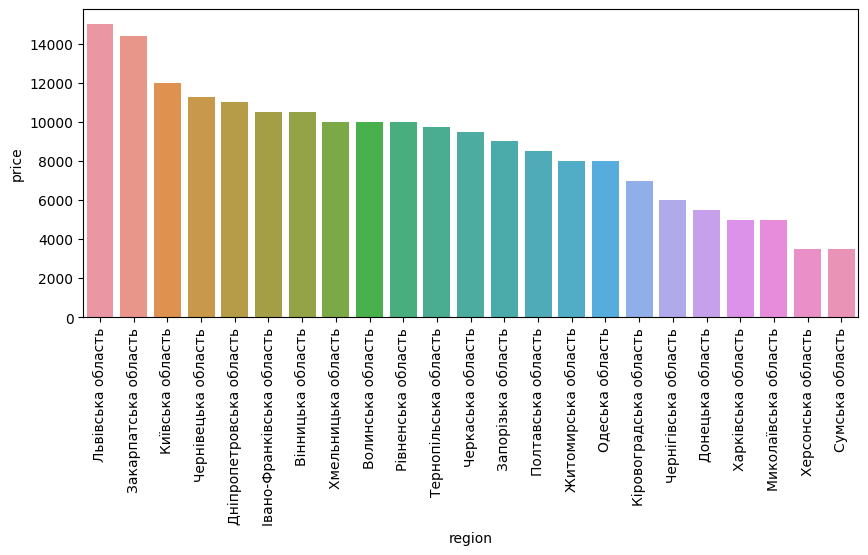

In [72]:
plt.figure(figsize=(10,4))
sns.barplot(x= df['region'], y= df['price'], ci=False, estimator=np.median, order=df_sorted.index)
plt.xticks(rotation=90)

In [73]:
df['pets'] = df['pets'].apply(lambda x: False if x == '[]' else True)
display(df['pets'].value_counts())

city = df.groupby('pets')['price']
city.agg(['mean', 'median'])

False    4216
True      496
Name: pets, dtype: int64

,mean,median
pets,,
False,10574.949597,9000.0
True,11986.307460,9500.0


<ipython-input-74-998587bc3b70>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x= df['region'], y= df['price'],hue=df['pets'],ci= False)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Сумська область'),
  Text(1, 0, 'Херсонська область'),
  Text(2, 0, 'Донецька область'),
  Text(3, 0, 'Львівська область'),
  Text(4, 0, 'Житомирська область'),
  Text(5, 0, 'Кіровоградська область'),
  Text(6, 0, 'Харківська область'),
  Text(7, 0, 'Одеська область'),
  Text(8, 0, 'Закарпатська область'),
  Text(9, 0, 'Тернопільська область'),
  Text(10, 0, 'Черкаська область'),
  Text(11, 0, 'Івано-Франківська область'),
  Text(12, 0, 'Рівненська область'),
  Text(13, 0, 'Полтавська область'),
  Text(14, 0, 'Запорізька область'),
  Text(15, 0, 'Чернівецька область'),
  Text(16, 0, 'Миколаївська область'),
  Text(17, 0, 'Хмельницька область'),
  Text(18, 0, 'Дніпропетровська область'),
  Text(19, 0, 'Волинська область'),
  Text(20, 0, 'Чернігівська область'),
  Text(21, 0, 'Вінницька область'),
  Text(22, 0, 'Київська область')])

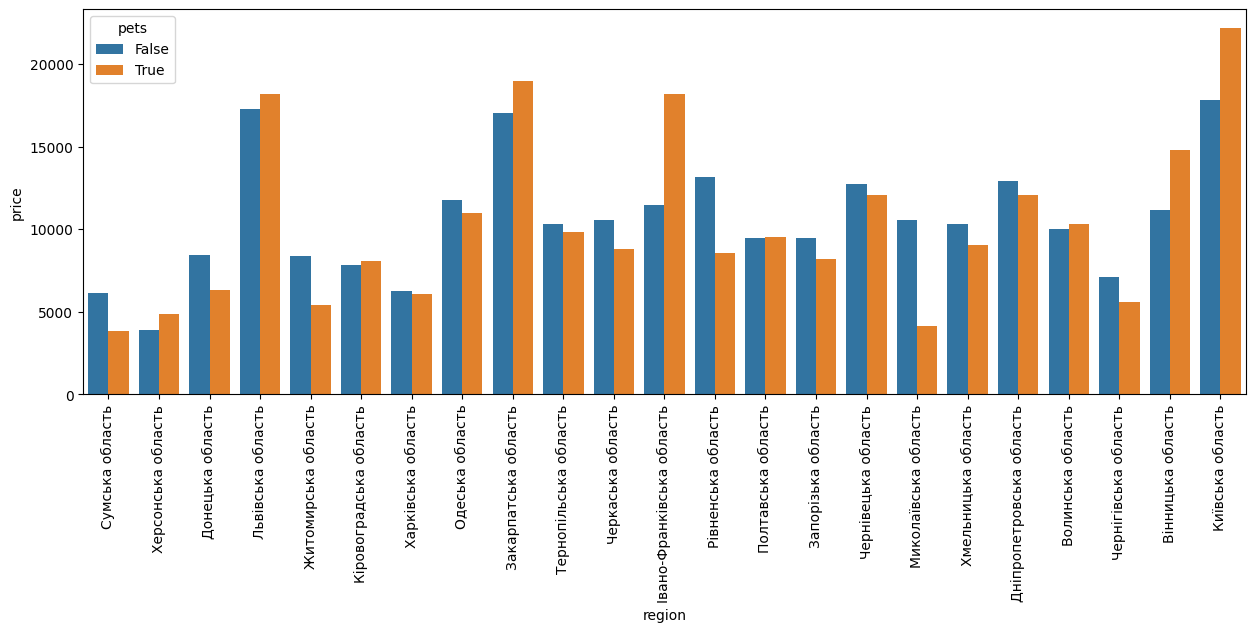

In [74]:
plt.figure(figsize= (15,5))
sns.barplot(x= df['region'], y= df['price'],hue=df['pets'],ci= False)
plt.xticks(rotation=90)

In [75]:
df.groupby('is_furnished')['price'].mean().sort_values(ascending = False)

is_furnished
False    12138.135593
True     10715.077005
Name: price, dtype: float64

<ipython-input-76-9dafdda75b36>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.catplot(x='region', y='price', col='is_furnished', kind='bar', ci=False, data=df).set_xticklabels(rotation=90)


<Figure size 1500x600 with 0 Axes>

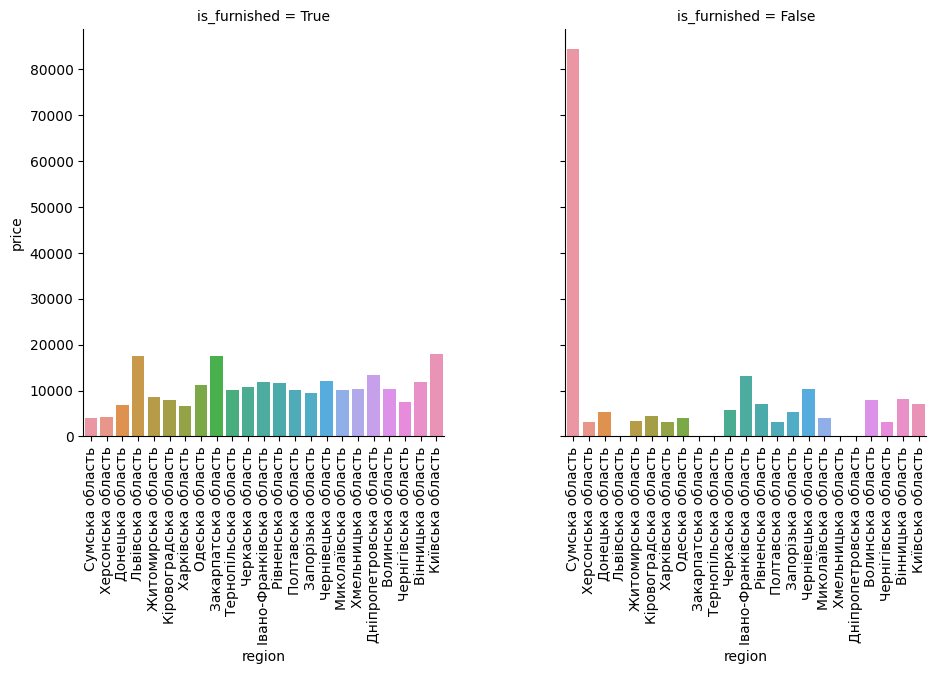

In [76]:
plt.figure(figsize=(15,6))
sns.catplot(x='region', y='price', col='is_furnished', kind='bar', ci=False, data=df).set_xticklabels(rotation=90)

region
Івано-Франківська область    283500.0
Волинська область             26250.0
Вінницька область             45000.0
Дніпропетровська область      63750.0
Донецька область             375000.0
Житомирська область           26250.0
Закарпатська область         202500.0
Запорізька область            28000.0
Київська область             150000.0
Кіровоградська область        27000.0
Львівська область             75000.0
Миколаївська область         202500.0
Одеська область               80595.0
Полтавська область            37500.0
Рівненська область           324000.0
Сумська область               11500.0
Тернопільська область         31875.0
Харківська область            30000.0
Херсонська область            13125.0
Хмельницька область           35000.0
Черкаська область             32000.0
Чернівецька область          162000.0
Чернігівська область         112500.0
Name: price, dtype: float64

<ipython-input-81-16711df9a883>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.catplot(x='region', y='price', col='is_furnished', kind='bar', ci=False, data=df).set_xticklabels(rotation=90)


<Figure size 1500x600 with 0 Axes>

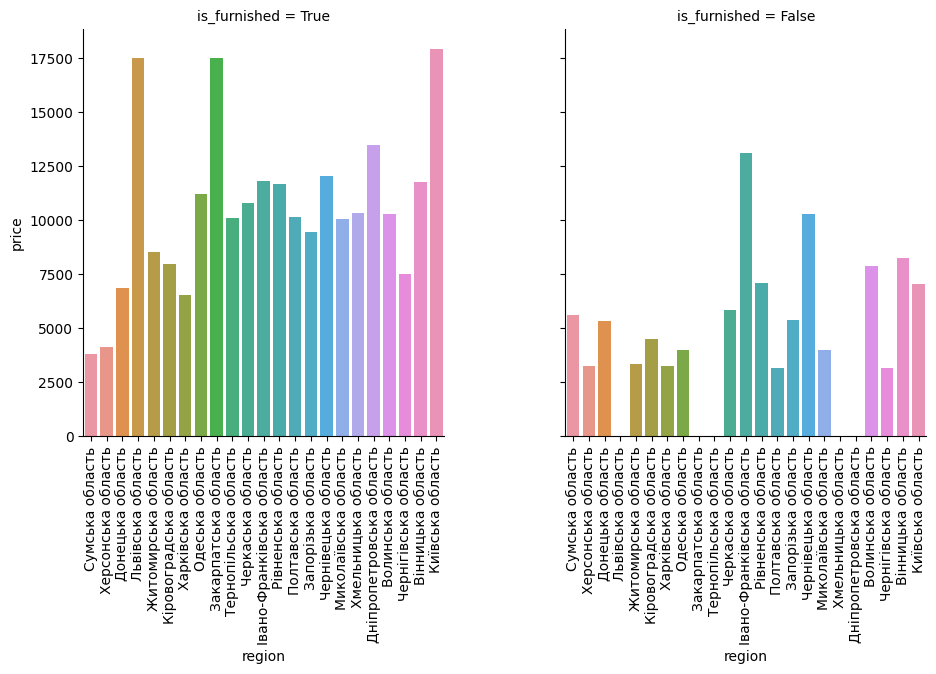

In [81]:
max_price = df[df['region'] == 'Сумська область']['price'].max()
df = df[~((df['region'] == 'Сумська область') & (df['price'] == max_price))]

display(df.groupby('region')['price'].max())

plt.figure(figsize=(15,6))
sns.catplot(x='region', y='price', col='is_furnished', kind='bar', ci=False, data=df).set_xticklabels(rotation=90)

In [82]:
df.groupby('is_furnished')['price'].mean().sort_values(ascending = False)

is_furnished
True     10710.555999
False     5450.862069
Name: price, dtype: float64

In [94]:
# Create a new column 'price_per_m3' that represents the price per cubic meter
df['price_per_m3'] = df['price'] / df['apartment_area_m3']

# Group by 'region' and 'rooms_number', and calculate the mean of 'price_per_m3' in each group
avg_price_per_m3 = df.groupby(['region', 'rooms_number'])['price_per_m3'].mean()
avg_price_per_m3

region                     rooms_number
Івано-Франківська область  1               295.048942
                           2               196.226448
                           3               181.066101
                           4               133.863147
Волинська область          1               228.521087
                                              ...    
Чернівецька область        4               151.248790
Чернігівська область       1               158.155457
                           2               142.791701
                           3               129.268265
                           4                82.722701
Name: price_per_m3, Length: 95, dtype: float64

<ipython-input-102-5caa444fb2da>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.catplot(x='region', y='price_per_m3', col='rooms_number', kind='bar', ci=False, data=df).set_xticklabels(rotation=90)


<Figure size 1500x600 with 0 Axes>

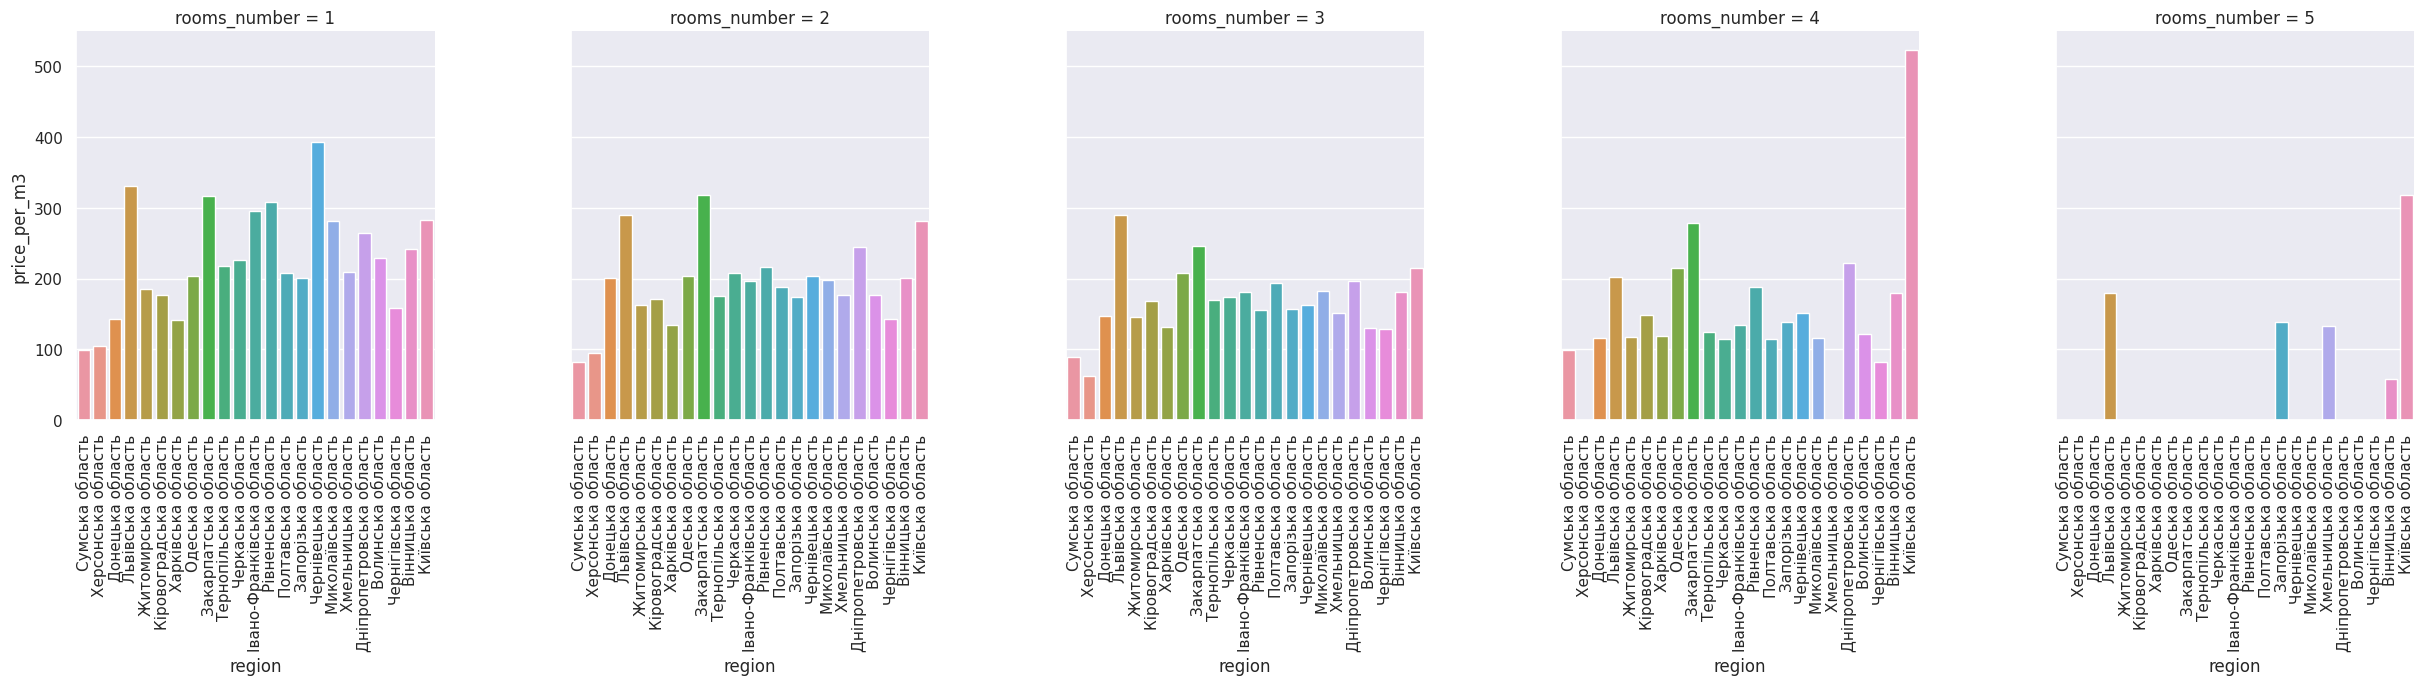

In [102]:
plt.figure(figsize=(15,6))
sns.catplot(x='region', y='price_per_m3', col='rooms_number', kind='bar', ci=False, data=df).set_xticklabels(rotation=90)

<ipython-input-101-891a4a9cdfa8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),center=0,annot=True)


<Axes: >

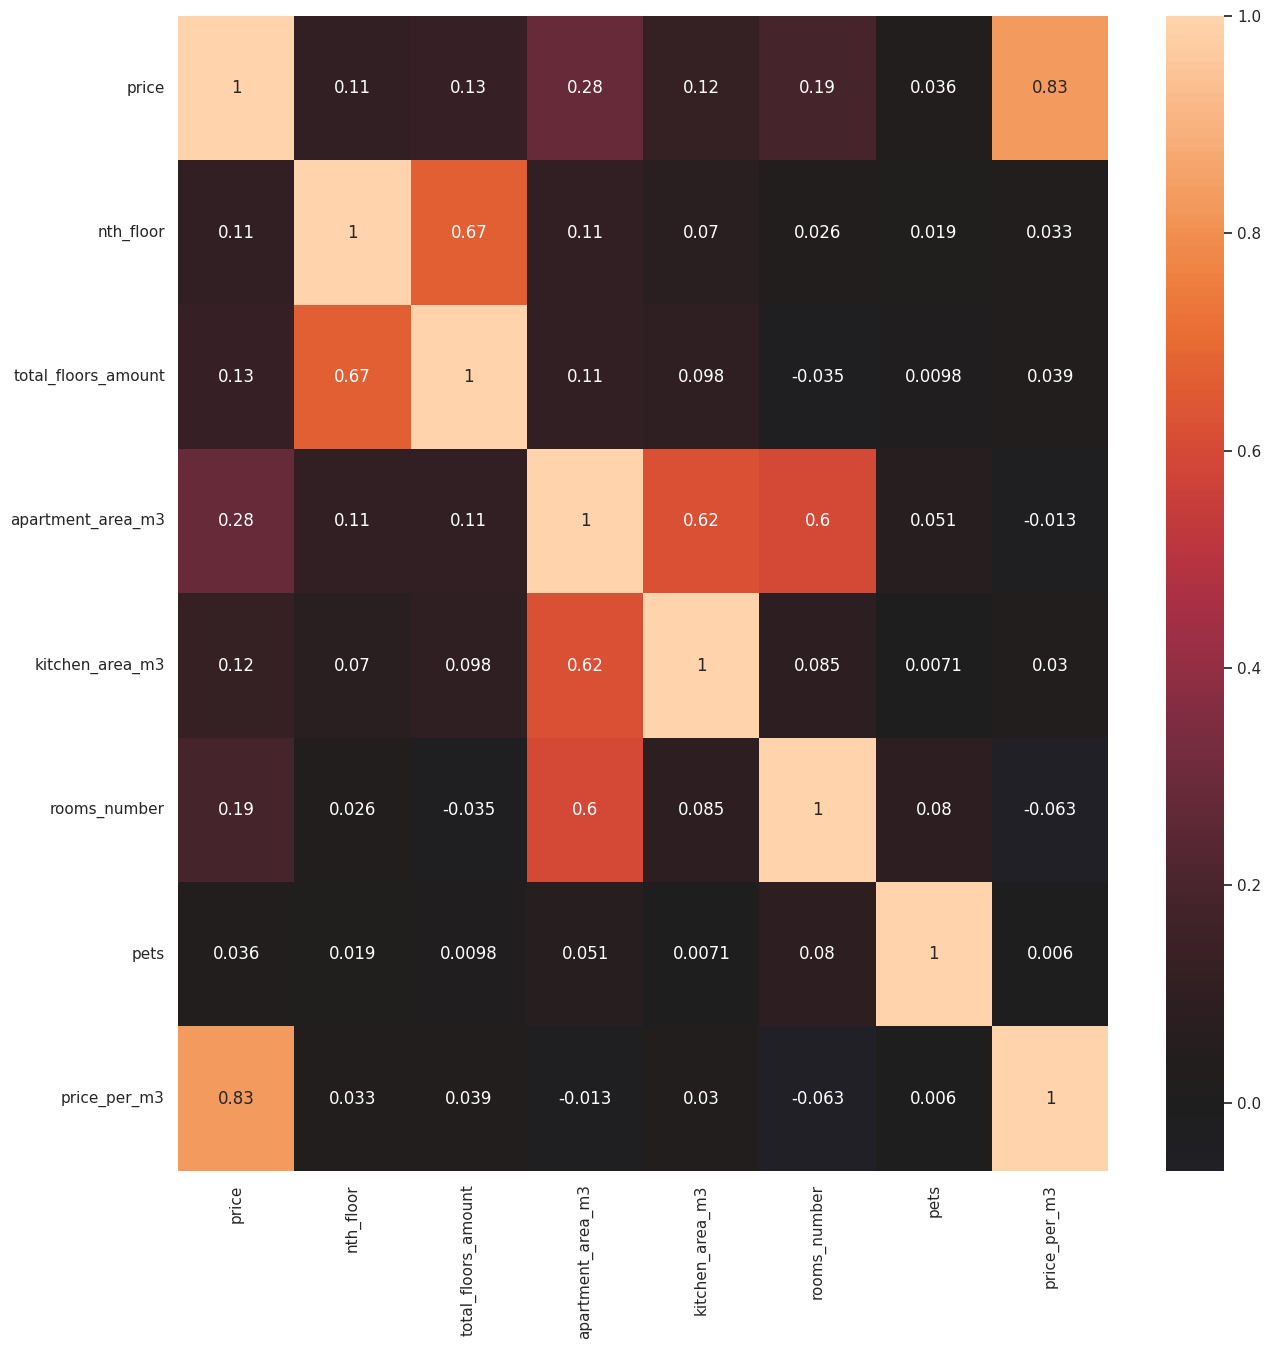

In [101]:
plt.figure(figsize=[15,15])
sns.set(font_scale=1)
sns.heatmap(df.corr(),center=0,annot=True)